<a href="https://colab.research.google.com/github/cisirtraining/summerschool/blob/master/epilepsy_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Mount Google Drive for Data Access**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

##Recurrent Neural Networks

The idea behind RNNs is to make use of sequential information. In a traditional neural network we assume that all inputs (and outputs) are independent of each other. But for many tasks that’s a very bad idea. If you want to predict the next word in a sentence you better know which words came before it. RNNs are called recurrent because they perform the same task for every element of a sequence, with the output being depended on the previous computations and you already know that they have a “memory” which captures information about what has been calculated so far.

![](https://drive.google.com/uc?id=1EW9HBneLrcleW1IBR0GE2VJrZhPG-pkc)
## Issues of RNN:
*   Vanishing gradient problem
*   Exploding gradient problem

## Long-Short Term Memory(LSTM)
The LSTM has three gates that update and control the cell states, these are the forget gate, input gate and output gate. The gates use hyperbolic tangent and sigmoid activation functions. 

![alt text](https://drive.google.com/uc?id=1coyG3t6Mbe04WPn8xPdL-64zmdz1oidj)
[Source](https://www.analyticsvidhya.com/blog/2017/12/fundamentals-of-deep-learning-introduction-to-lstm/)


The forget gate controls what information in the cell state to forget, given new information than entered the network.

![alt text](https://drive.google.com/uc?id=1q-iNGMv_OGIuwpQ7xxtec_wwxo0rhB7j)
[Source](https://medium.com/datadriveninvestor/how-do-lstm-networks-solve-the-problem-of-vanishing-gradients-a6784971a577)

The input gate controls what new information will be encoded into the cell state, given the new input information.
![alt text](https://drive.google.com/uc?id=17432J3U9VTGqsf76LzuH96XwkGjk-aji)
[Source](https://medium.com/datadriveninvestor/how-do-lstm-networks-solve-the-problem-of-vanishing-gradients-a6784971a577)

The output gate controls what information encoded in the cell state is sent to the network as input in the following time step, this is done via the output vector Ht.
![alt text](https://drive.google.com/uc?id=1u7zWxzP__o0lEhuNzvUjufj886KEcAqf)
[Source](https://medium.com/datadriveninvestor/how-do-lstm-networks-solve-the-problem-of-vanishing-gradients-a6784971a577)

##**Dataset Description**

>### Bonn Epileptic Dataset
Source: http://epileptologie-bonn.de/cms/front_content.php?idcat=193&lang=3
 <figure>
<center>
<img src='https://drive.google.com/uc?id=1eIc9eI6ByIt7onVJ2pv6-EQ44qbbTYnT' />
</center>
</figure>



* Bonn dataset is categorized into 5 subsets (A - E), each subset contains 100 single-channel EEG signals of 23.6 seconds obtained from 5 patients - recorded at 173.61 Hz with 12-bit resolution.   
*   Example of raw signal is depicted in the figure with only set E contains epileptic seizure activity.
&nbsp;&nbsp;

<figure>
<center>
<img src='https://drive.google.com/uc?id=1xhvMyPXe_-pkEOwl3Yf0qZkUyiFu6yp4' />
</center>
</figure>



##**Download EEG Dataset**

*  dataset from Bonn University Epilepsy Dataset
*   100 files for each set and 4097 samples per file




In [0]:
!pip install scikit-plot

!wget http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/Z.zip  # Set A
!wget http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/O.zip  # Set B
!wget http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/N.zip  # Set C
!wget http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/F.zip  # Set D
!wget http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/S.zip  # Set E
  
!unzip Z.zip -d 'Set A'
!unzip O.zip -d 'Set B'
!unzip N.zip -d 'Set C'
!unzip F.zip -d 'Set D'
!unzip S.zip -d 'Set E'
  

##**Load Dataset**

*   Load EEG data from Set A (Normal) and Set E (Epileptic) and their respective labels 
*   Label convention: Normal = 0 and Epileptic = 1



In [0]:
import glob
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

DATA_DIR_A = './Set A/'
DATA_DIR_B = './Set B/'
DATA_DIR_C = './Set C/'
DATA_DIR_D = './Set D/'
DATA_DIR_E = './Set E/'

LABEL_C1 = 0
LABEL_C2 = 1

def load_data():
    data = []
    nbFiles = 0
    for fname in tqdm(os.listdir(DATA_DIR_A)):
        img = np.loadtxt(DATA_DIR_A + fname)
        data.append([np.array(img), np.array(LABEL_C1)])
        nbFiles+=1
        
    for fname in tqdm(os.listdir(DATA_DIR_E)):
        img = np.loadtxt(DATA_DIR_E + fname)
        data.append([np.array(img), np.array(LABEL_C2)])
        nbFiles+=1
        
    return data


data = load_data()
print('\n')
print('Total Files: {}'.format(len(data)))
print('Shape of data: {}'.format(np.shape(data)))

##**Sanity Check - Visualize Subset from Set A and E**

In [0]:
# data visualization

import random
mpl.rcParams['figure.figsize'] = (20,10)

fig = plt.figure()

samples_c1 = np.empty((0, 4097), int)
while len(samples_c1) < 4:
    curID = random.randint(0, len(data)) # random id between 0-200
    if data[curID][1] == LABEL_C1:
        samples_c1 = np.vstack((samples_c1, data[curID][0]))
        
samples_c2 = np.empty((0, 4097), int)
while len(samples_c2) < 4:
    curID = random.randint(0, len(data))
    if data[curID][1] == LABEL_C2:
        samples_c2 = np.vstack((samples_c2, data[curID][0]))
        
for i in range(0, 4):
    plt.subplot(421 + i * 2)
    plt.plot(samples_c1[i])
    plt.subplot(421 + i * 2 + 1)
    plt.plot(samples_c2[i])

ax = plt.subplot(421)
ax.set_title("CLASS 1")
ax = plt.subplot(422)
ax.set_title("CLASS 2")

fig.suptitle("Set B vs Set E", fontsize=20)
plt.show()

##**Data Preparation**

*   Split data into training and testing set, 80% training and 20% testing 
*   Convert the label to one-hot-encoded vectors: 0 >> [1,0] and 1 >> [0,1]



In [0]:
# data preparation

from sklearn.utils import shuffle
data = shuffle(data)

nb_train = round(len(data) * 0.8)
data_train = data[0:nb_train]
data_test = data[nb_train:]

X_train = np.array([d[0] for d in data_train])
Y_train = np.array([d[1] for d in data_train])

X_test = np.array([d[0] for d in data_test])
Y_test = np.array([d[1] for d in data_test])

    
X_train = X_train.reshape(X_train.shape[0], 4097, 1)
Y_train = Y_train.reshape(Y_train.shape[0], 1)

X_test = X_test.reshape(X_test.shape[0], 4097, 1)
Y_test = Y_test.reshape(Y_test.shape[0], 1)


print('Training data :',X_train.shape)
print('Training label:',Y_train.shape)
print('Testing data  :',X_test.shape)
print('Testing label :',Y_test.shape)

print('\nOriginal training label:\n',Y_train[0:3])


# Encode labels to hot vectors (ex : 2 -> 0=[1,0] and 1=[0,1])
from keras.utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 2)
Y_test = to_categorical(Y_test, num_classes = 2)


print('\nOne-hot encoded label:\n',Y_train[0:3])

##**Model Training**
>>### Long Short Term Memory (LSTM)

>>![](https://drive.google.com/uc?id=1coyG3t6Mbe04WPn8xPdL-64zmdz1oidj)

[Source](https://www.analyticsvidhya.com/blog/2017/12/fundamentals-of-deep-learning-introduction-to-lstm/)





In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.callbacks import EarlyStopping,ModelCheckpoint


batch_size = 4
nb_epoch = 10
hidden_size = 128
use_dropout=True

earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
chckpoint = ModelCheckpoint('lstm_model.h5', save_best_only=True, monitor='val_loss', mode='min')


model = Sequential()
model.add(LSTM(hidden_size, input_shape=(4097,1)))


if use_dropout:
  model.add(Dropout(0.35))

model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['mae', 'acc'])

print(model.summary())

# history = model.fit(X_train, Y_train, verbose=1, validation_data=(X_test, Y_test),shuffle=True, batch_size=batch_size, nb_epoch=nb_epoch, callbacks=[earlyStopping,chckpoint])

# model.save('./drive/My Drive/mammogram/output/lstm_model.h5')


##Plot Learning Curves
Should have something like this!
![alt text](https://drive.google.com/uc?id=1VysuZaAPPOYOvkP-BJ0Wpj-9oKNt8oyF)

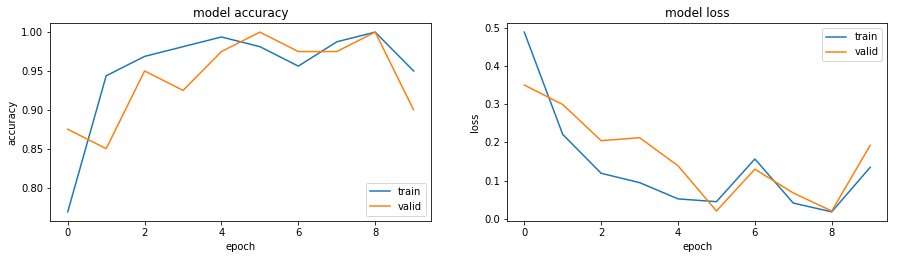

dict_keys(['val_loss', 'val_mean_absolute_error', 'val_acc', 'loss', 'mean_absolute_error', 'acc'])


In [0]:
import matplotlib.pyplot as plt

plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid'],loc='lower right') 
    
plt.subplot(222)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid'], loc='upper right') 

plt.show()

print(history.history.keys())

In [0]:
# Look at confusion matrix 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

##**Standard Evaluation Metrics**



$$Precision = \frac{TP}{TP+FP} $$

$$Recall = \frac{TP}{TP+FN} $$

$$F1 = 2 * \frac{Precision*Recall}{Precision + Recall}$$



##**Model Evaluation**

In [0]:
import itertools
import sklearn
from sklearn.metrics import confusion_matrix
import scikitplot
from keras.models import load_model, Model

# Load trained network
model = load_model('./drive/My Drive/data/lstm_model.h5')
print('\n****************** model loaded *******************')

# Evaluate the trained model
score = model.evaluate(X_test, Y_test, batch_size=batch_size)
print("\n[info] loss={:.3f}, accuracy: {:.3f}%\n".format(score[0],score[2] * 100))

# Make prediction
y_pred = model.predict(X_test) 
map_characters = {0: 'normal', 1: 'epileptic'}
print('\n', sklearn.metrics.classification_report(np.where(Y_test > 0)[1], np.argmax(y_pred, axis=1), target_names=list(map_characters.values())), sep='')

Y_pred_classes = np.argmax(y_pred,axis = 1) 
Y_true = np.argmax(Y_test,axis = 1) 

# plot confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = list(map_characters.values()))


# Plot roc curve:
scikitplot.metrics.plot_roc(np.argmax(Y_test, axis=1), y_pred, figsize=(10,8))
plt.show()

##**Visual Sanity Check**

In [0]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import cv2
from google.colab.patches import cv2_imshow
import random

idx = random.sample(range(0,40), 6) # regenerate random index

for i in range(6):
    (normal, epileptic) = model.predict(X_test)[idx[i]]
    label = "normal" if normal > epileptic else "epileptic"
    proba = epileptic if epileptic > normal else normal
    label = "{}: {:.2f}%".format(label, proba * 100)
    true_label = 'normal' if (Y_test[idx[i]] == 1)[0] else 'epileptic'
   
    plt.subplot(611+i)
    plt.plot(X_test[idx[i]])
    plt.title('True:{} (Predicted:{})'.format(true_label,label))
    plt.axis('on')
    plt.tight_layout()
         